In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("cleaned_numeric_data_centers.csv")
display(df.head())

,country,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,tier_distribution,key_operators,cloud_provider,internet_penetration_percent,growth_rate_of_data_centers_percent_per_year,cooling_technologies_common
0,United States,5426,300,2000,3.552000e+09,12000.0,27.00,"I:5%, II:15%, III:60%, IV:20%","Equinix, Digital Realty, CoreSite, AWS","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92.0,12.0,"Air, Liquid, Immersion"
1,Germany,529,50,200,3.500000e+08,2000.0,40.00,"II:10%, III:70%, IV:20%","Equinix, Digital Realty, e-shelter","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92.0,8.0,"Air, Indirect Evap."
2,United Kingdom,523,30,150,2.000000e+08,1000.0,0.45,"II:15%, III:70%, IV:15%","Equinix, Telehouse, Virtus","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96.0,7.0,"Air, Free Cooling"
3,China,449,100,1000,5.000000e+08,8000.0,0.25,"II:20%, III:60%, IV:20%","China Unicom, Tencent, Alibaba, GDS","AWS:Yes, GCP:No, Azure:Yes, Oracle:Yes",76.0,15.0,"Air, Liquid"
4,France,322,20,110,1.200000e+08,700.0,40.00,"II:20%, III:70%, IV:10%","Equinix, Interxion, Data4","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",91.0,6.0,"Air, Liquid"


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   country                                       191 non-null    object 
 1   total_data_centers                            191 non-null    int64  
 2   hyperscale_data_centers                       191 non-null    int64  
 3   colocation_data_centers                       191 non-null    int64  
 4   floor_space_sqft_total                        183 non-null    float64
 5   power_capacity_MW_total                       165 non-null    float64
 6   average_renewable_energy_usage_percent        148 non-null    float64
 7   tier_distribution                             179 non-null    object 
 8   key_operators                                 170 non-null    object 
 9   cloud_provider                                149 non-null    obj

In [17]:
print(f"Skewness: {df['total_data_centers'].skew():.3f}")
print(f"Skewness: {df['hyperscale_data_centers'].skew():.3f}")
print(f"Skewness: {df['colocation_data_centers'].skew():.3f}")
print(f"Skewness: {df['internet_penetration_percent'].skew():.3f}")
print(f"Skewness: {df['growth_rate_of_data_centers_percent_per_year'].skew():.3f}")
print(f"Skewness: {df['floor_space_sqft_total'].skew():.3f}")
print(f"Skewness: {df['power_capacity_MW_total'].skew():.3f}")
print(f"Skewness: {df['average_renewable_energy_usage_percent'].skew():.3f}")

Skewness: 12.961
Skewness: 11.315
Skewness: 10.669
Skewness: -0.707
Skewness: 2.697
Skewness: 12.898
Skewness: 8.315
Skewness: 0.078


<Axes: xlabel='floor_space_sqft_total', ylabel='Count'>

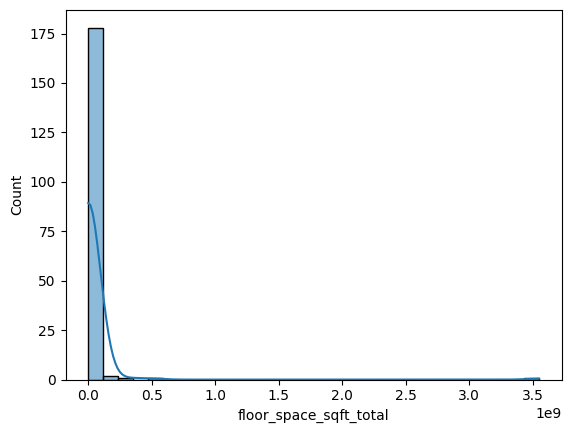

In [9]:
sns.histplot(df["floor_space_sqft_total"], bins=30, kde=True)

In [15]:
print("Renewable Energy Usage Statistics:")
print(f"Mean:     {df['floor_space_sqft_total'].mean():.2f}%")
print(f"Median:   {df['floor_space_sqft_total'].median():.2f}%")
print(f"Skewness: {df['floor_space_sqft_total'].skew():.3f}")

Renewable Energy Usage Statistics:
Mean:     28216765.19%
Median:   30000.00%
Skewness: 12.898


<Axes: xlabel='power_capacity_MW_total', ylabel='Count'>

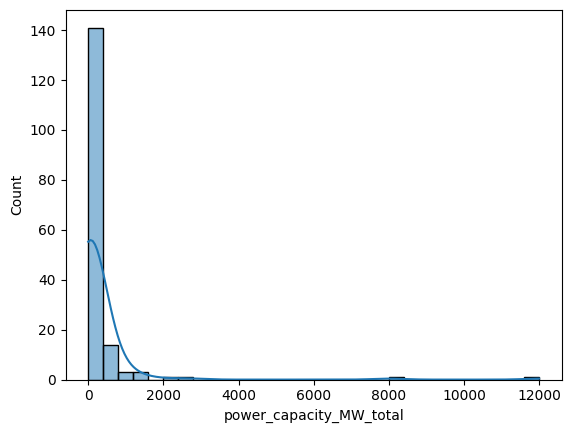

In [10]:
sns.histplot(df["power_capacity_MW_total"], bins=30, kde=True)

In [14]:
print("Renewable Energy Usage Statistics:")
print(f"Mean:     {df['power_capacity_MW_total'].mean():.2f}%")
print(f"Median:   {df['power_capacity_MW_total'].median():.2f}%")
print(f"Skewness: {df['power_capacity_MW_total'].skew():.3f}")

Renewable Energy Usage Statistics:
Mean:     275.30%
Median:   15.00%
Skewness: 8.315


<Axes: xlabel='average_renewable_energy_usage_percent', ylabel='Count'>

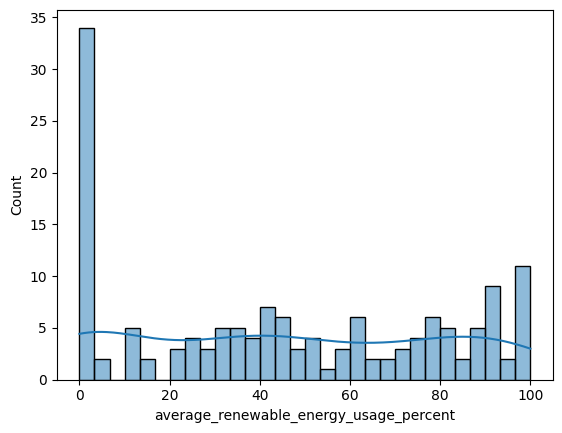

In [11]:
sns.histplot(df["average_renewable_energy_usage_percent"], bins=30, kde=True)

In [ ]:
print("Renewable Energy Usage Statistics:")
print(f"Mean:     {df['average_renewable_energy_usage_percent'].mean():.2f}%")
print(f"Median:   {df['average_renewable_energy_usage_percent'].median():.2f}%")
print(f"Skewness: {df['average_renewable_energy_usage_percent'].skew():.3f}")

Renewable Energy Usage Statistics:
Mean:     45.28%
Median:   43.00%
Skewness: 0.078


## Correlation heatmap of all the numerical columns from df. This will drop the missing values so we are not working with the full data as we have not done any impuation yet.

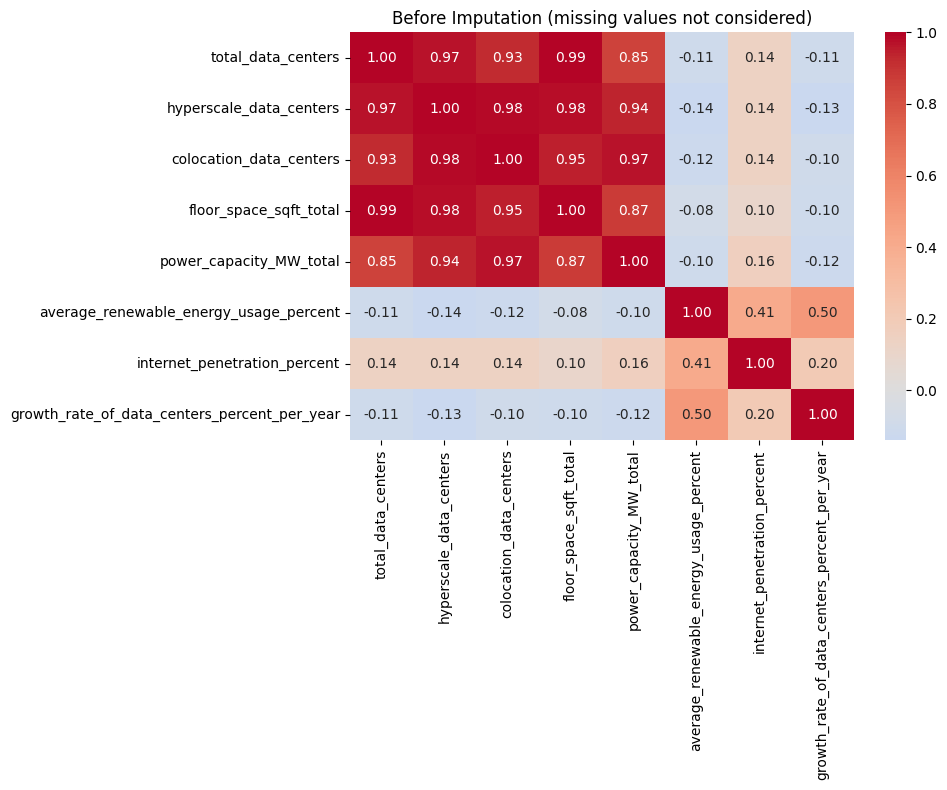

In [5]:
numerical_cols_with_missing = [
    'floor_space_sqft_total', 
    'power_capacity_MW_total', 
    'average_renewable_energy_usage_percent', 
    'internet_penetration_percent',
    'growth_rate_of_data_centers_percent_per_year'
]
complete_numerical_cols = [
    'total_data_centers', 
    'hyperscale_data_centers', 
    'colocation_data_centers'
]

all_numerical_cols = complete_numerical_cols + numerical_cols_with_missing
data_complete = df[all_numerical_cols].dropna()
corr_before = data_complete.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_before, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0)
plt.title('Before Imputation (missing values not considered)')
plt.tight_layout()
plt.show()

## Step 1: Use SimpleImputer to fill in missing numerical values quickly. 

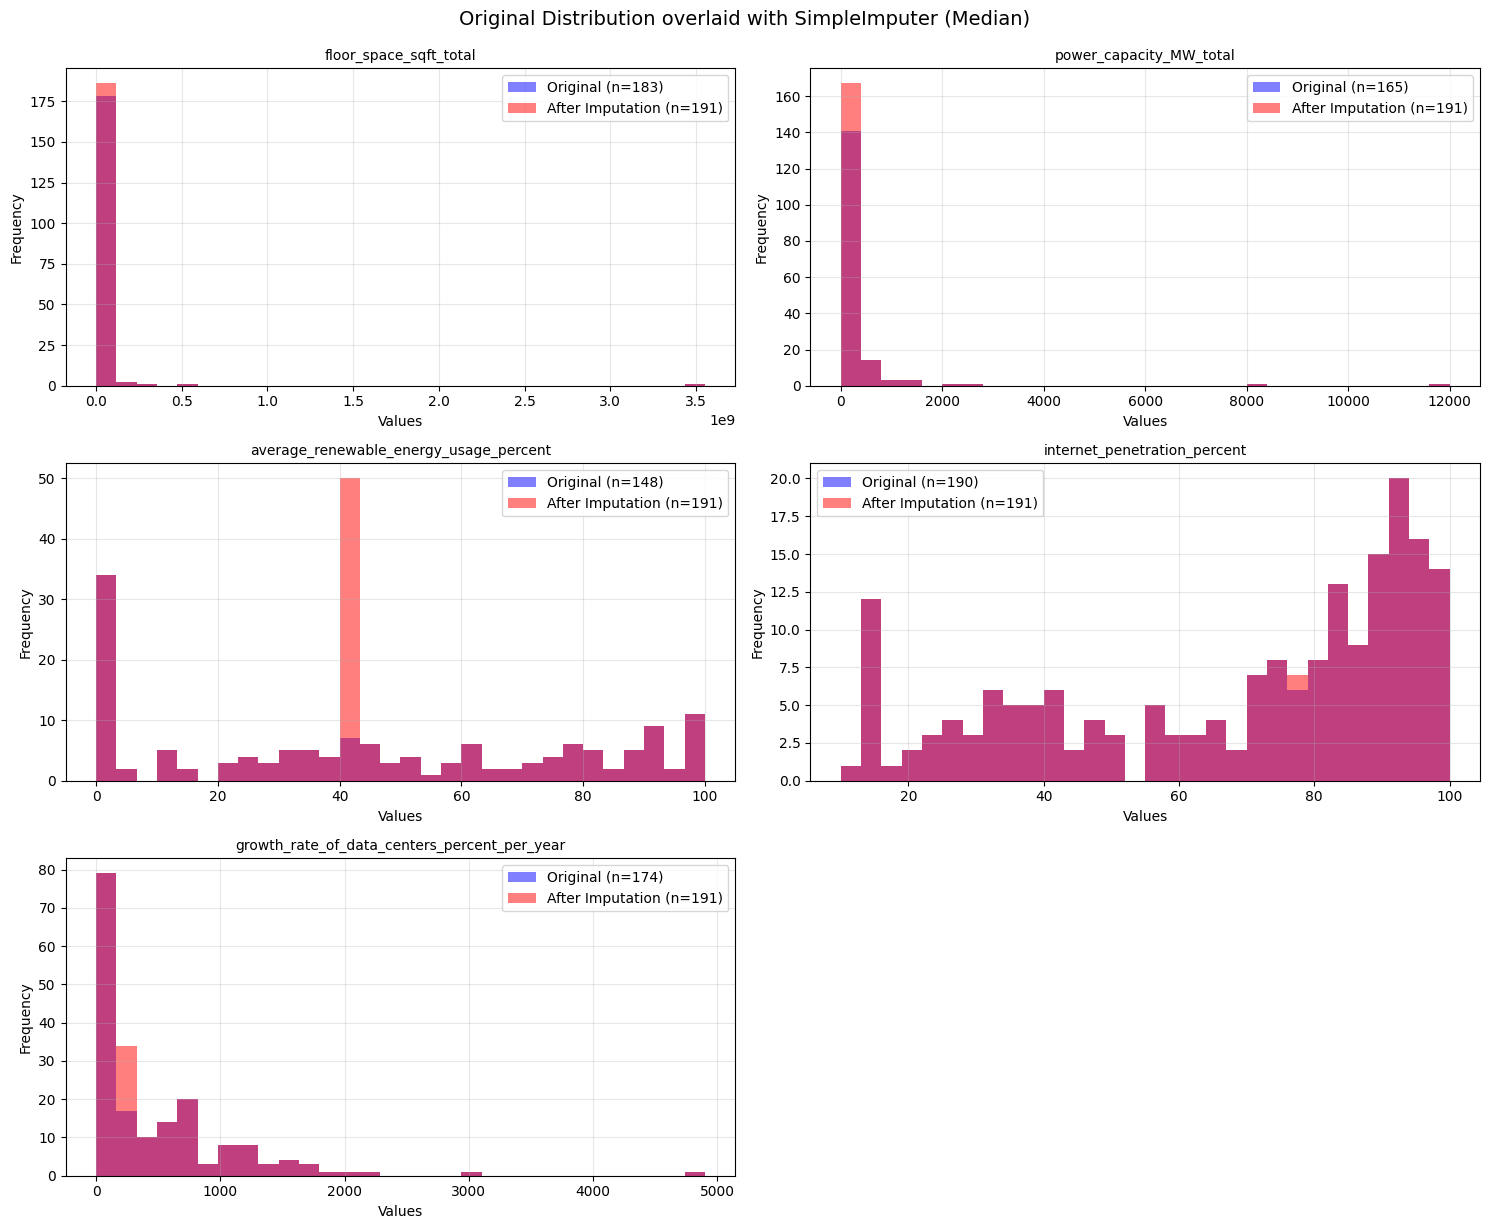


Imputation Summary:

floor_space_sqft_total:
  Missing values imputed: 8 (4.2%)
  Median value used: 30000.00

power_capacity_MW_total:
  Missing values imputed: 26 (13.6%)
  Median value used: 15.00

average_renewable_energy_usage_percent:
  Missing values imputed: 43 (22.5%)
  Median value used: 43.00

internet_penetration_percent:
  Missing values imputed: 1 (0.5%)
  Median value used: 78.70

growth_rate_of_data_centers_percent_per_year:
  Missing values imputed: 17 (8.9%)
  Median value used: 230.00


In [6]:
from sklearn.impute import SimpleImputer
#-----------------------IMPUTATION------------------------------------------------
median_imputer = SimpleImputer(strategy='median', missing_values=np.nan)
X_missing = df[numerical_cols_with_missing]
imputed_X = median_imputer.fit_transform(X_missing)

imputed_df = pd.DataFrame(imputed_X, columns=numerical_cols_with_missing, index=df.index)
data_centers_imputed = df.copy()
data_centers_imputed[numerical_cols_with_missing] = imputed_df

#------------------------FIGURES--------------------------------------------------
fig, axes = plt.subplots(3, 2, figsize=(15, 12)) # 5 plots for 5 missing variables
axes = axes.flatten()

for idx, col in enumerate(numerical_cols_with_missing):
    ax = axes[idx]
    
    # Original data with missing values
    original_data = df[col].dropna()
    
    # Complete imputed dataset (NaNs replaced with median of column)
    imputed_complete_data = data_centers_imputed[col]
    
    # Plot original data
    ax.hist(original_data, bins=30, alpha=0.5, label=f'Original (n={len(original_data)})', 
            color='blue')
    
    # Plot complete imputed data on top
    ax.hist(imputed_complete_data, bins=30, alpha=0.5, label=f'After Imputation (n={len(imputed_complete_data)})', 
            color='red')
    
    ax.set_title(f'{col}', fontsize=10)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

fig.delaxes(axes[5])

plt.tight_layout()
plt.suptitle('Original Distribution overlaid with SimpleImputer (Median)', fontsize=14, y=1.02)
plt.show()

# ----------------------SIMPLE SUMMARY STATS-------------------------------------------------------
print("\nImputation Summary:")
for col in numerical_cols_with_missing:
    n_missing = df[col].isna().sum()
    n_total = len(df[col])
    pct_missing = (n_missing / n_total) * 100
    median_val = df[col].median()
    
    print(f"\n{col}:")
    print(f"  Missing values imputed: {n_missing} ({pct_missing:.1f}%)")
    print(f"  Median value used: {median_val:.2f}")

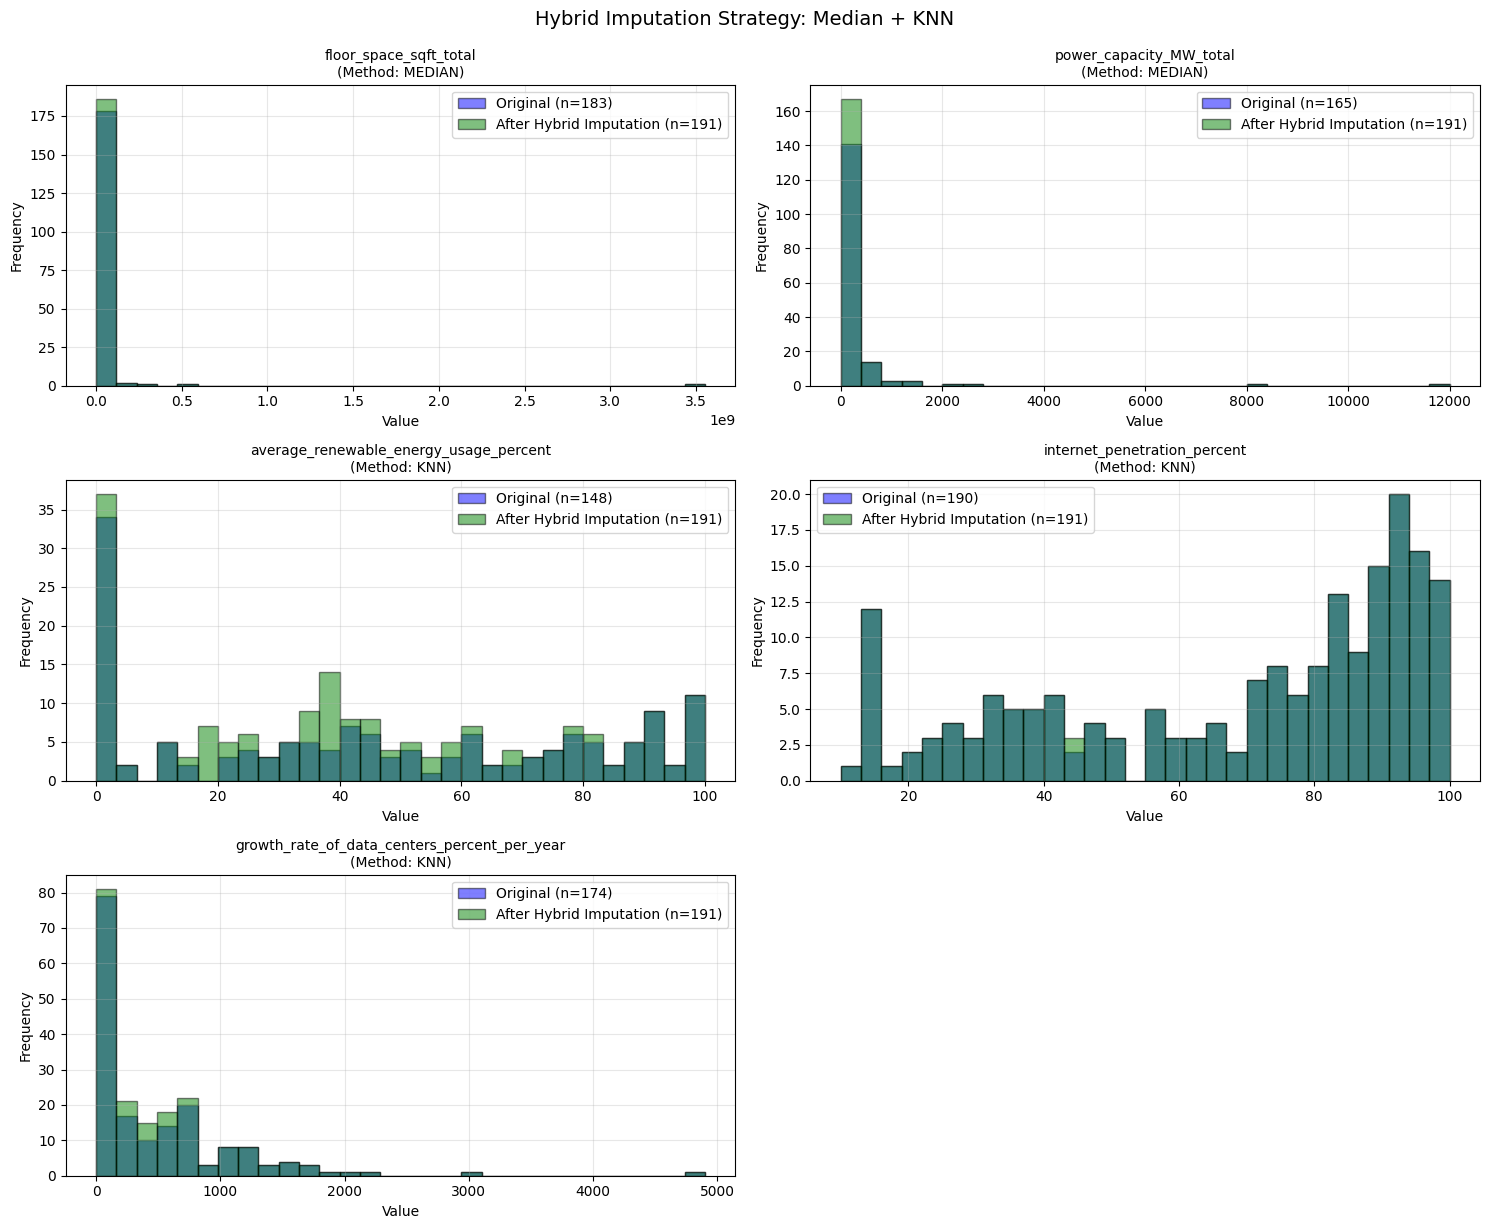

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler

data_centers_hybrid_imputed = df.copy()

median_columns = ['floor_space_sqft_total', 'power_capacity_MW_total']
median_imputer = SimpleImputer(strategy='median')
for col in median_columns:
    if data_centers_hybrid_imputed[col].isnull().any():
        data_centers_hybrid_imputed[col] = median_imputer.fit_transform(
            data_centers_hybrid_imputed[[col]]
        )

knn_columns = ['average_renewable_energy_usage_percent', 
               'internet_penetration_percent',
               'growth_rate_of_data_centers_percent_per_year']

knn_data = data_centers_hybrid_imputed[knn_columns + complete_numerical_cols]
data_centers_without_missing = knn_data.dropna()

if len(data_centers_without_missing) > 0:
    scaler = StandardScaler()
    
    complete_rows = knn_data.dropna()
    scaler.fit(complete_rows)
    
    knn_data_scaled = pd.DataFrame(
        scaler.transform(knn_data),
        columns=knn_data.columns,
        index=knn_data.index
    )
    
    knn_imputer = KNNImputer(n_neighbors=5)
    knn_imputed_scaled = knn_imputer.fit_transform(knn_data_scaled)
    
    knn_imputed = pd.DataFrame(
        scaler.inverse_transform(knn_imputed_scaled),
        columns=knn_data.columns,
        index=knn_data.index
    )
    
    for col in knn_columns:
        data_centers_hybrid_imputed[col] = knn_imputed[col]
else:
    print("Not enough complete rows for KNN, using median instead")
    for col in knn_columns:
        if data_centers_hybrid_imputed[col].isnull().any():
            data_centers_hybrid_imputed[col] = median_imputer.fit_transform(
                data_centers_hybrid_imputed[[col]]
            )

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols_with_missing):
    ax = axes[idx]
    
    original_data = df[col].dropna()
    ax.hist(original_data, bins=30, alpha=0.5, 
            label=f'Original (n={len(original_data)})', 
            color='blue', edgecolor='black')
    
    imputed_complete = data_centers_hybrid_imputed[col]
    ax.hist(imputed_complete, bins=30, alpha=0.5, 
            label=f'After Hybrid Imputation (n={len(imputed_complete)})', 
            color='green', edgecolor='black')
    
    if col in median_columns:
        method = "MEDIAN"
    else:
        method = "KNN"
    
    ax.set_title(f'{col}\n(Method: {method})', fontsize=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

fig.delaxes(axes[5])
plt.tight_layout()
plt.suptitle('Hybrid Imputation Strategy: Median + KNN', 
             fontsize=14, y=1.02)
plt.show()

In [9]:
data_centers_final = df.copy()

for col in numerical_cols_with_missing:
    data_centers_final[col] = data_centers_hybrid_imputed[col]

data_centers_final.to_csv('data_centers_numeric_imputed.csv', index=False)

# MICE Imputation but will not be used. -------------------------------------------

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
X = pd.DataFrame(df, columns=['floor_space_sqft_total', 'power_capacity_MW_total', 'average_renewable_energy_usage_percent', 'internet_penetration_percent', 'growth_rate_of_data_centers_percent_per_year'])
X.head()

,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,internet_penetration_percent,growth_rate_of_data_centers_percent_per_year
0,3.552000e+09,12000.0,27.00,92.0,12.0
1,3.500000e+08,2000.0,40.00,92.0,8.0
2,2.000000e+08,1000.0,0.45,96.0,7.0
3,5.000000e+08,8000.0,0.25,76.0,15.0
4,1.200000e+08,700.0,40.00,91.0,6.0


In [24]:
lr = LinearRegression()
imp = IterativeImputer(estimator=lr, verbose=2, max_iter=5, tol=1e-10, imputation_order='roman')
ImputedData = imp.fit_transform(X)

[IterativeImputer] Completing matrix with shape (191, 5)
[IterativeImputer] Ending imputation round 1/5, elapsed time 0.01
[IterativeImputer] Change: 14101787.808783611, scaled tolerance: 0.3552 
[IterativeImputer] Ending imputation round 2/5, elapsed time 0.01
[IterativeImputer] Change: 19017383.809314538, scaled tolerance: 0.3552 
[IterativeImputer] Ending imputation round 3/5, elapsed time 0.02
[IterativeImputer] Change: 8112664.432397718, scaled tolerance: 0.3552 
[IterativeImputer] Ending imputation round 4/5, elapsed time 0.03
[IterativeImputer] Change: 5159730.259502638, scaled tolerance: 0.3552 
[IterativeImputer] Ending imputation round 5/5, elapsed time 0.03
[IterativeImputer] Change: 3692123.5025347867, scaled tolerance: 0.3552 


C:\Users\sonuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [25]:
Imputed_data = pd.DataFrame(ImputedData)
Imputed_data.columns = ['floor_space_sqft_total', 'power_capacity_MW_total', 'average_renewable_energy_usage_percent', 'internet_penetration_percent', 'growth_rate_of_data_centers_percent_per_year']
Imputed_data.head()

,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,internet_penetration_percent,growth_rate_of_data_centers_percent_per_year
0,3.552000e+09,12000.0,27.00,92.0,12.0
1,3.500000e+08,2000.0,40.00,92.0,8.0
2,2.000000e+08,1000.0,0.45,96.0,7.0
3,5.000000e+08,8000.0,0.25,76.0,15.0
4,1.200000e+08,700.0,40.00,91.0,6.0


In [26]:
# Get the original data with missing values for comparison
completed_data = df[['floor_space_sqft_total', 'power_capacity_MW_total', 
                    'average_renewable_energy_usage_percent', 'internet_penetration_percent', 
                    'growth_rate_of_data_centers_percent_per_year']]

# You can save the final imputed data later if needed
# df.to_csv('cleaned_data_centers_current.csv', index=False)

# Evaluating Imputation Quality with Correlation Analysis

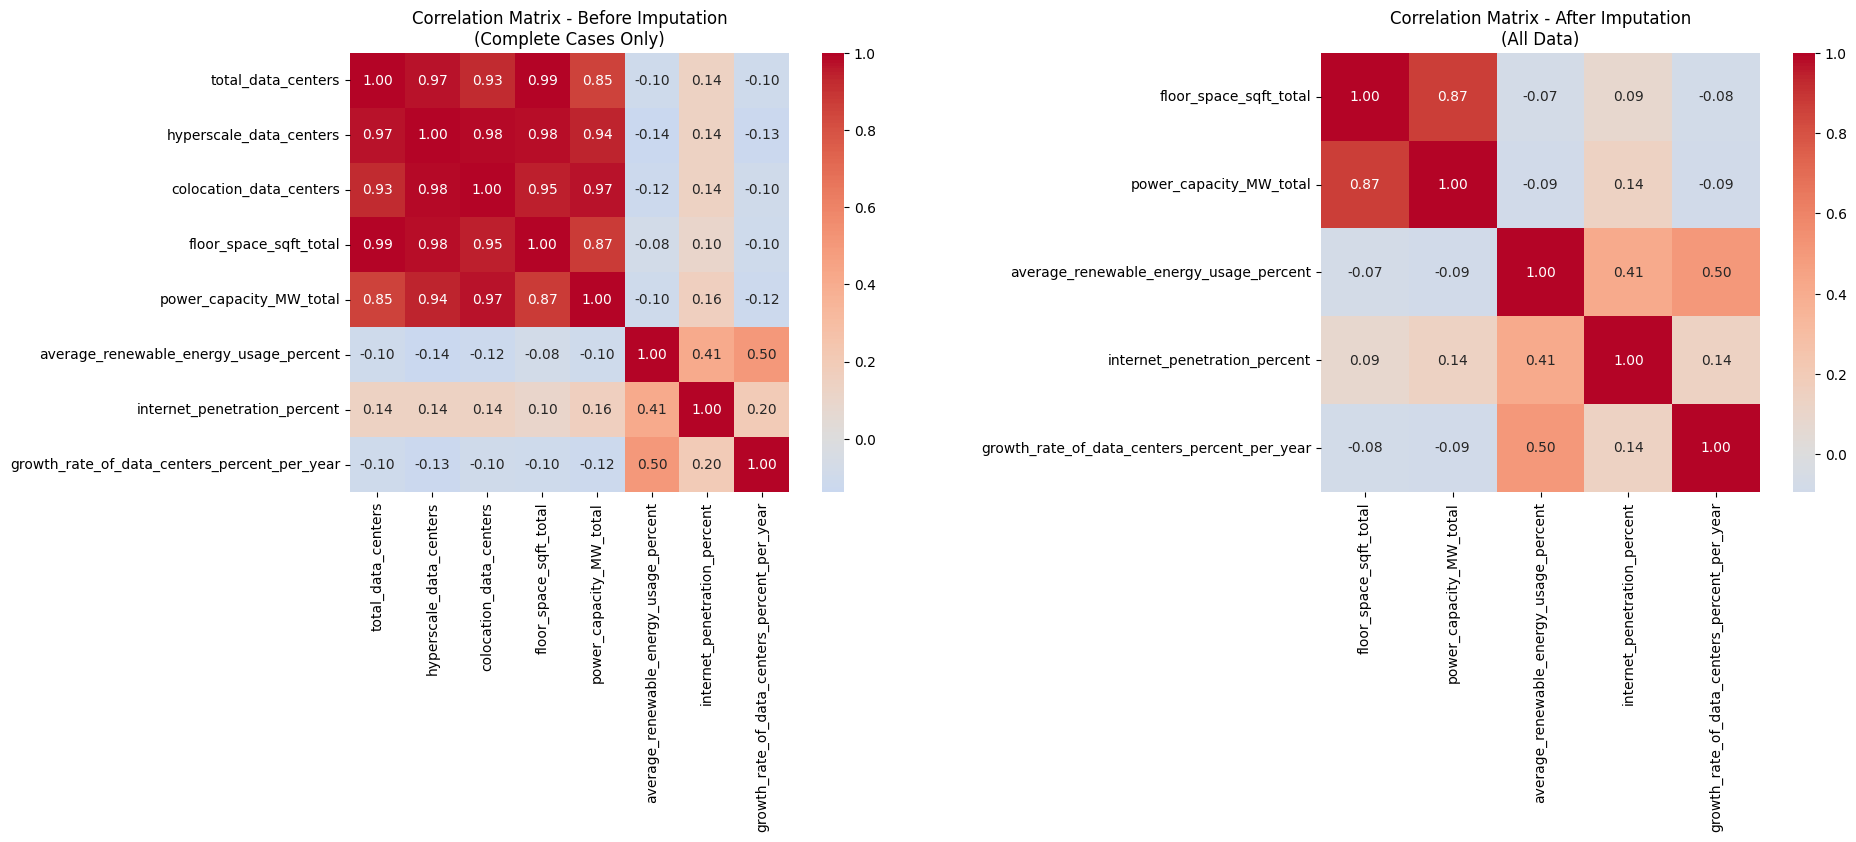


Changes in correlations (After - Before):
                                              average_renewable_energy_usage_percent  \
average_renewable_energy_usage_percent                                         0.000   
colocation_data_centers                                                          NaN   
floor_space_sqft_total                                                         0.008   
growth_rate_of_data_centers_percent_per_year                                   0.003   
hyperscale_data_centers                                                          NaN   
internet_penetration_percent                                                  -0.001   
power_capacity_MW_total                                                        0.013   
total_data_centers                                                               NaN   

                                              colocation_data_centers  \
average_renewable_energy_usage_percent                            NaN   
colocation_data_ce

In [ ]:
# Calculate correlation matrices
corr_before_imputation = data_complete.corr()
corr_after_imputation = Imputed_data.corr()

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot correlation matrix before imputation
sns.heatmap(corr_before_imputation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, ax=ax1)
ax1.set_title('Correlation Matrix - Before Imputation\n(Complete Cases Only)')

# Plot correlation matrix after imputation
sns.heatmap(corr_after_imputation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, ax=ax2)
ax2.set_title('Correlation Matrix - After Imputation\n(All Data)')

plt.tight_layout()
plt.show()

C:\Users\sonuk\AppData\Local\Temp\ipykernel_10140\1465529621.py:44: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\sonuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sonuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


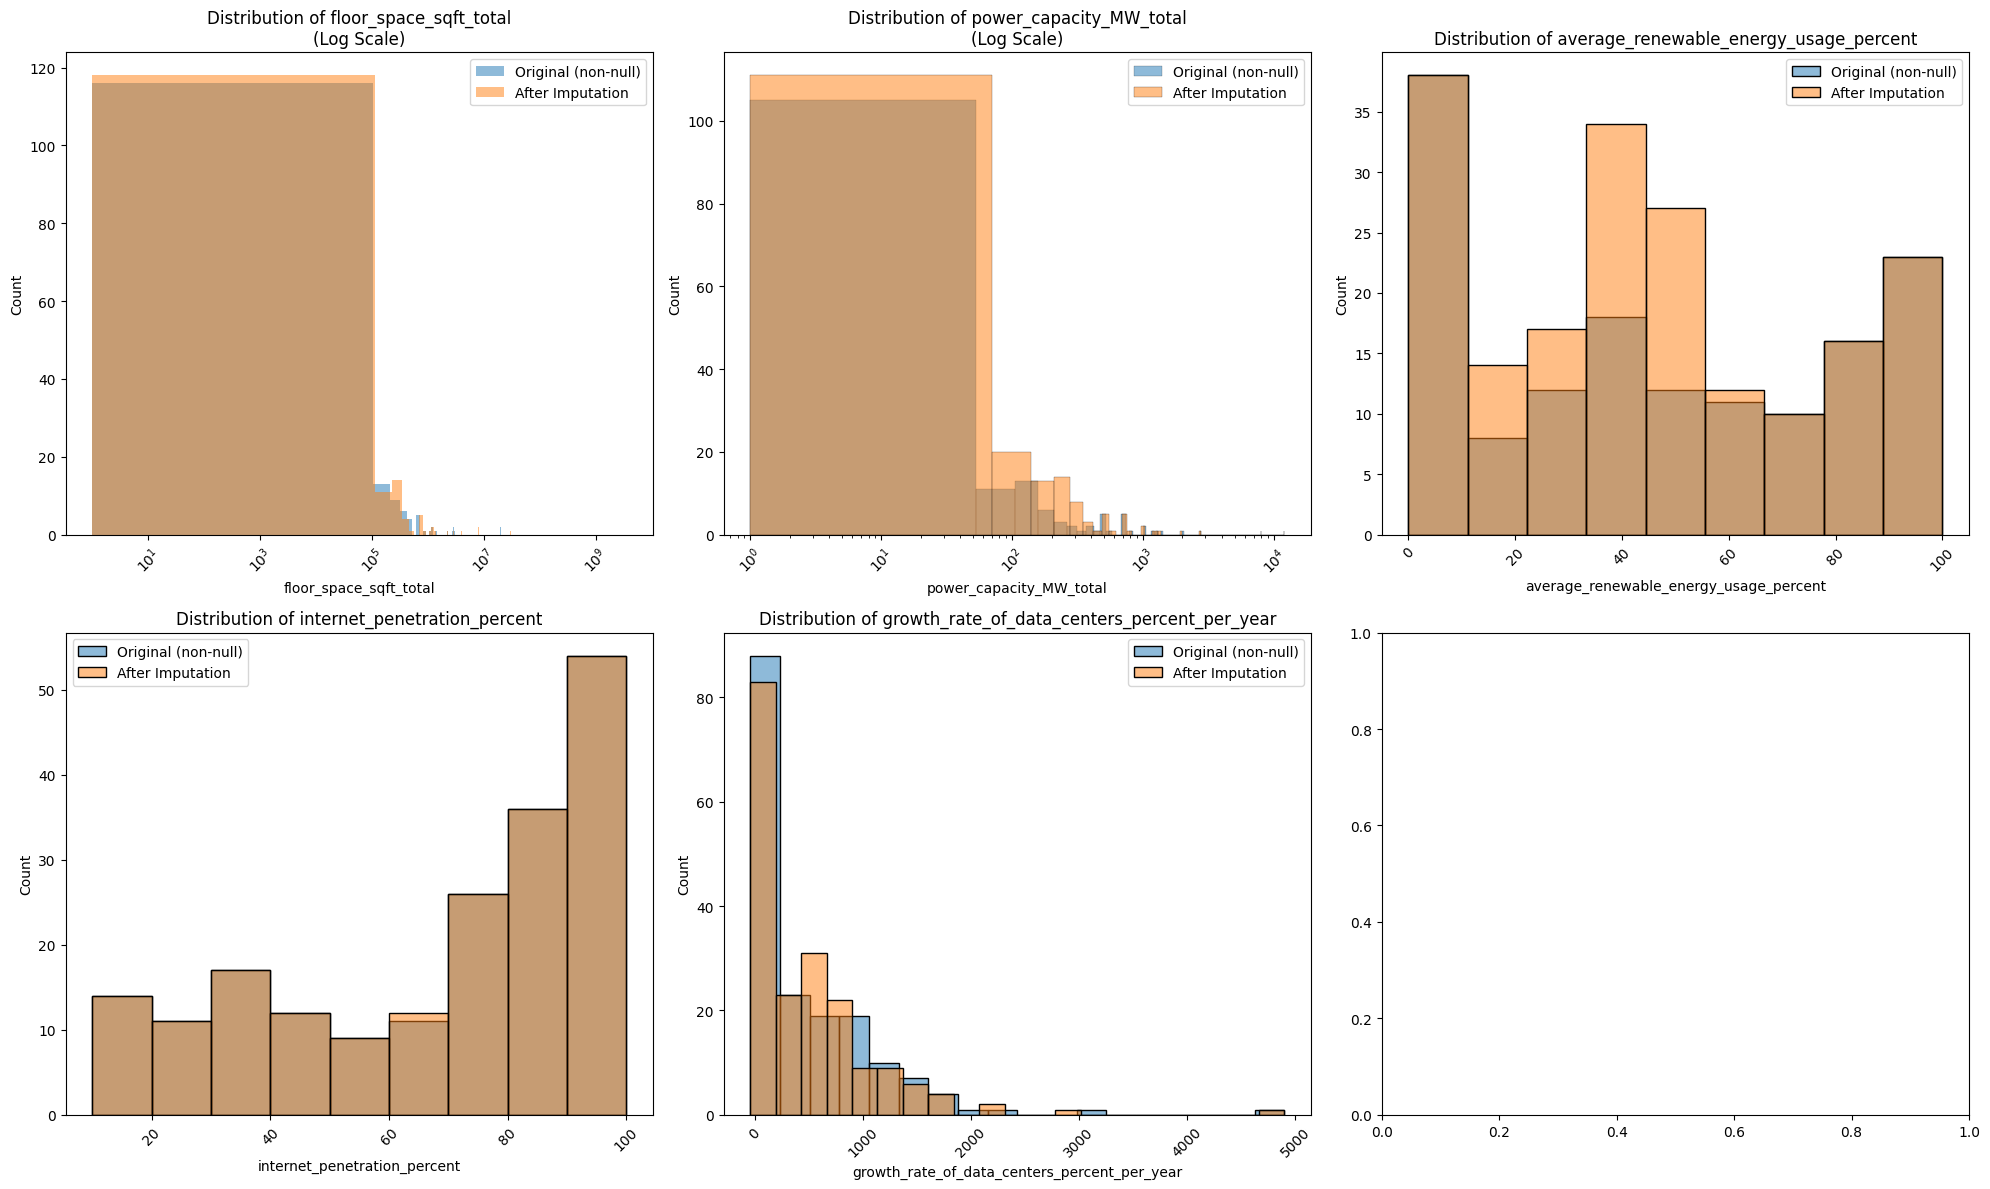


Summary statistics for floor_space_sqft_total:

Original data:
count    1.840000e+02
mean     2.806359e+07
std      2.656788e+08
min      0.000000e+00
25%      8.000000e+03
50%      3.125000e+04
75%      3.050000e+05
max      3.552000e+09
Name: floor_space_sqft_total, dtype: float64

Imputed data:
count    1.910000e+02
mean     2.798620e+07
std      2.607462e+08
min      0.000000e+00
25%      8.000000e+03
50%      3.500000e+04
75%      3.405000e+05
max      3.552000e+09
Name: floor_space_sqft_total, dtype: float64

Summary statistics for power_capacity_MW_total:

Original data:
count      165.000000
mean       275.303030
std       1158.560884
min          0.000000
25%          1.000000
50%         15.000000
75%        145.000000
max      12000.000000
Name: power_capacity_MW_total, dtype: float64

Imputed data:
count      191.000000
mean       266.502443
std       1077.141426
min          0.000000
25%          2.000000
50%         20.000000
75%        201.364148
max      12000.000000
N

In [34]:
# Visualize distributions before and after imputation
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, column in enumerate(Imputed_data.columns):
    if idx < len(axes):
        ax = axes[idx]
        
        # Decide if we should use log scale
        use_log = column in ['floor_space_sqft_total', 'power_capacity_MW_total']
        
        if use_log:
            # For log scale, we need to handle zeros and negative values
            original_data = completed_data[column].dropna()
            imputed_data = Imputed_data[column]
            
            # Add small constant to make all values positive for log scale
            min_val = min(original_data.min(), imputed_data.min())
            if min_val <= 0:
                offset = abs(min_val) + 1
                original_data = original_data + offset
                imputed_data = imputed_data + offset
            
            # Plot with log scale
            sns.histplot(data=original_data, 
                        label='Original (non-null)', alpha=0.5, ax=ax)
            sns.histplot(data=imputed_data,
                        label='After Imputation', alpha=0.5, ax=ax)
            ax.set_xscale('log')
            ax.set_title(f'Distribution of {column}\n(Log Scale)')
        else:
            # Regular plotting for other columns
            sns.histplot(data=completed_data[column].dropna(), 
                        label='Original (non-null)', alpha=0.5, ax=ax)
            sns.histplot(data=Imputed_data[column], 
                        label='After Imputation', alpha=0.5, ax=ax)
            ax.set_title(f'Distribution of {column}')
        
        ax.legend()
        
        # Rotate x-axis labels for better readability
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics for the log-scaled columns
for column in ['floor_space_sqft_total', 'power_capacity_MW_total']:
    print(f"\nSummary statistics for {column}:")
    print("\nOriginal data:")
    print(completed_data[column].dropna().describe())
    print("\nImputed data:")
    print(Imputed_data[column].describe())

In [32]:
Imputed_data.head()

,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,internet_penetration_percent,growth_rate_of_data_centers_percent_per_year
0,3.552000e+09,12000.0,27.00,92.0,12.0
1,3.500000e+08,2000.0,40.00,92.0,8.0
2,2.000000e+08,1000.0,0.45,96.0,7.0
3,5.000000e+08,8000.0,0.25,76.0,15.0
4,1.200000e+08,700.0,40.00,91.0,6.0
